# Banking Churn Dataset - Explorative Datenanalyse

Dieses Notebook analysiert das Banking Customer Churn Dataset von Kaggle und bereitet es für die Verwendung im Mortgage Churn Prediction Kontext vor.

**Dataset:** Bank Customer Churn (Kaggle)
**Quelle:** https://www.kaggle.com/datasets/mathchi/churn-for-bank-customers
**Ziel:** Adaptation für Mortgage Churn Prediction

## Inhaltsverzeichnis
1. Daten laden
2. Erste Inspektion
3. Feature-Analyse
4. Churn-Analyse
5. Feature Engineering für Mortgage Kontext
6. Datenexport für Modelltraining

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Plotting Settings
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Warnings
import warnings
warnings.filterwarnings('ignore')

print("Imports erfolgreich")

Matplotlib is building the font cache; this may take a moment.


Imports erfolgreich


## 1. Daten laden

In [2]:
# Pfade
PROJECT_ROOT = Path.cwd().parent
DATA_DIR = PROJECT_ROOT / 'data' / 'raw' / 'banking_churn'

# Finde CSV-Datei (Name kann variieren)
csv_files = list(DATA_DIR.glob('*.csv'))

if not csv_files:
    print(f"FEHLER: Keine CSV-Datei gefunden in {DATA_DIR}")
    print("Bitte führen Sie zuerst aus: python scripts/download_datasets.py --banking")
else:
    data_file = csv_files[0]
    print(f"Lade Daten von: {data_file}")
    df = pd.read_csv(data_file)
    print(f"✓ Daten geladen: {df.shape[0]} Zeilen, {df.shape[1]} Spalten")

Lade Daten von: /Users/manuel/Documents/Entwicklung/01 active/hypo-churn/data/raw/banking_churn/churn.csv
✓ Daten geladen: 10000 Zeilen, 14 Spalten


## 2. Erste Inspektion

In [3]:
# Dataset Info
print("="*70)
print("DATASET INFORMATION")
print("="*70)
print(f"Shape: {df.shape}")
print(f"\nColumns:\n{df.columns.tolist()}")
print(f"\nData Types:\n{df.dtypes}")
print(f"\nMemory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

DATASET INFORMATION
Shape: (10000, 14)

Columns:
['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']

Data Types:
RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

Memory Usage: 2.41 MB


In [4]:
# Erste Zeilen
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [5]:
# Deskriptive Statistiken
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
# Missing Values
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing_Count': missing,
    'Percentage': missing_pct
})

print("Missing Values:")
print(missing_df[missing_df['Missing_Count'] > 0])

if missing_df['Missing_Count'].sum() == 0:
    print("✓ Keine fehlenden Werte gefunden!")

Missing Values:
Empty DataFrame
Columns: [Missing_Count, Percentage]
Index: []
✓ Keine fehlenden Werte gefunden!


In [7]:
# Duplikate
duplicates = df.duplicated().sum()
print(f"Duplikate: {duplicates}")

if duplicates == 0:
    print("✓ Keine Duplikate gefunden!")

Duplikate: 0
✓ Keine Duplikate gefunden!


## 3. Feature-Analyse

In [8]:
# Kategorische Features
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"Kategorische Features: {categorical_cols}")

for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())

Kategorische Features: ['Surname', 'Geography', 'Gender']

Surname:
Surname
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: count, Length: 2932, dtype: int64

Geography:
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

Gender:
Gender
Male      5457
Female    4543
Name: count, dtype: int64


Numerische Features: ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


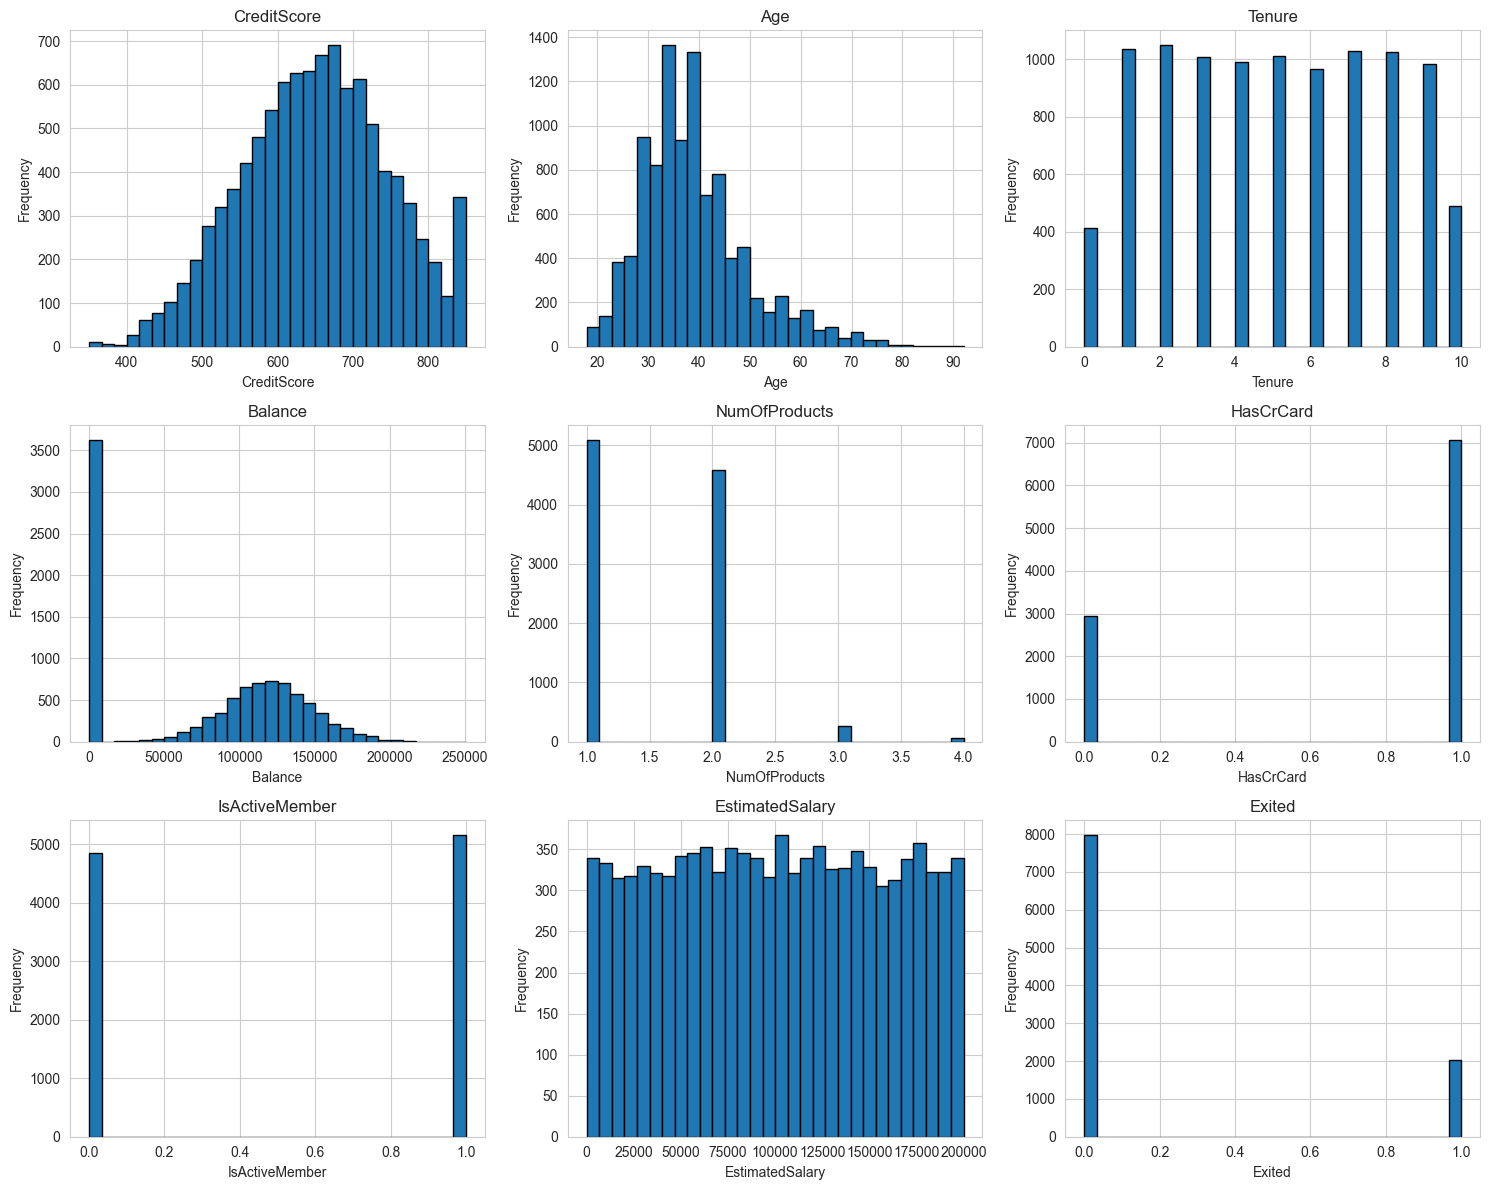

In [9]:
# Numerische Features Verteilung
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Entferne IDs
numeric_cols = [col for col in numeric_cols if 'id' not in col.lower() and 'rownumber' not in col.lower()]

print(f"Numerische Features: {numeric_cols}")

# Histogramme
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(numeric_cols[:9]):
    df[col].hist(bins=30, ax=axes[i], edgecolor='black')
    axes[i].set_title(col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

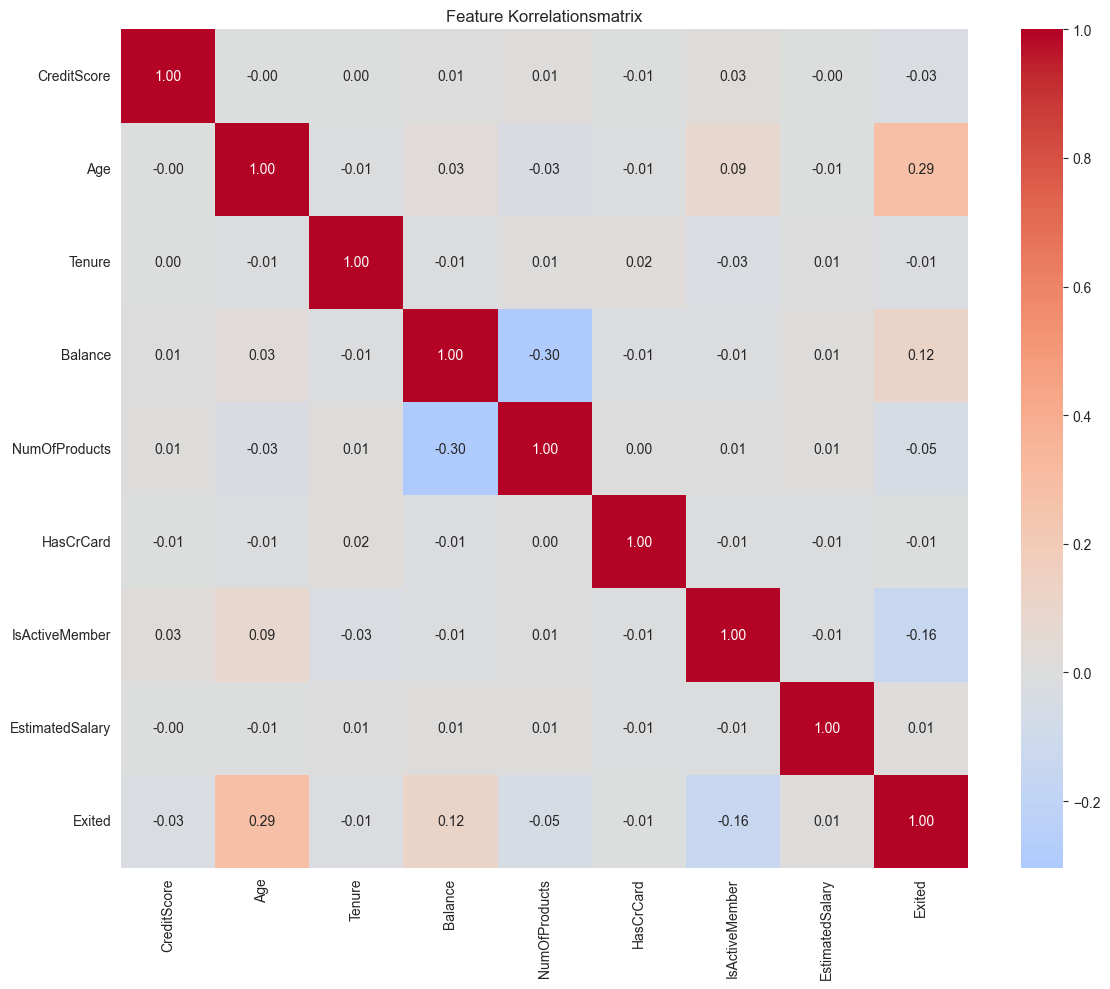

In [10]:
# Korrelationsmatrix
correlation = df[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Feature Korrelationsmatrix')
plt.tight_layout()
plt.show()

## 4. Churn-Analyse

Churn Rate: 20.37%
Churned: 2037 Kunden
Retained: 7963 Kunden


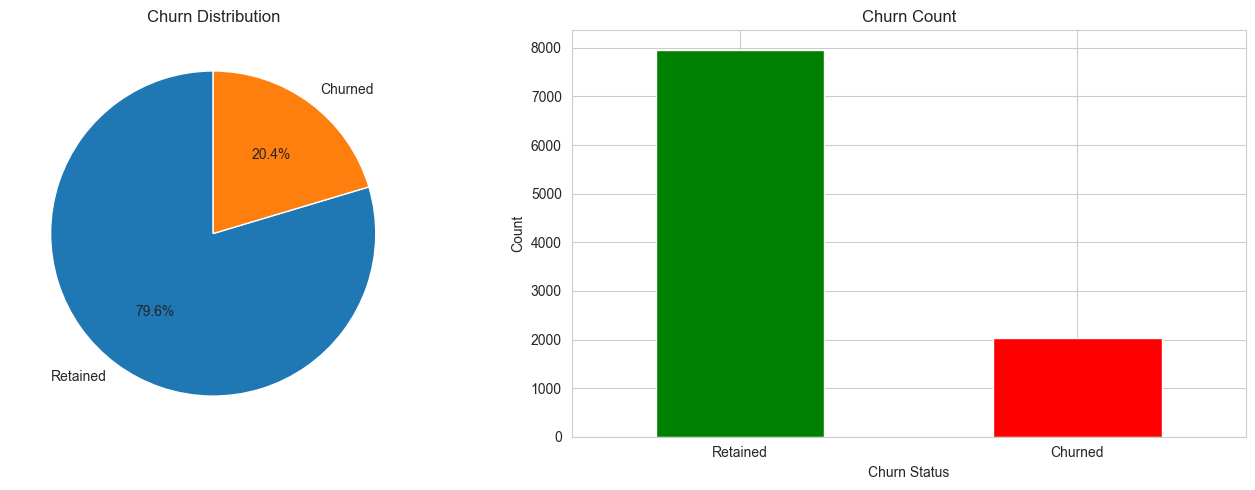

In [11]:
# Churn Rate
churn_col = 'Exited'  # Passen Sie an, falls der Name anders ist

if churn_col in df.columns:
    churn_rate = df[churn_col].mean()
    print(f"Churn Rate: {churn_rate:.2%}")
    print(f"Churned: {df[churn_col].sum()} Kunden")
    print(f"Retained: {(~df[churn_col].astype(bool)).sum()} Kunden")

    # Visualisierung
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Pie Chart
    churn_counts = df[churn_col].value_counts()
    axes[0].pie(churn_counts, labels=['Retained', 'Churned'], autopct='%1.1f%%', startangle=90)
    axes[0].set_title('Churn Distribution')

    # Bar Chart
    churn_counts.plot(kind='bar', ax=axes[1], color=['green', 'red'])
    axes[1].set_title('Churn Count')
    axes[1].set_xlabel('Churn Status')
    axes[1].set_ylabel('Count')
    axes[1].set_xticklabels(['Retained', 'Churned'], rotation=0)

    plt.tight_layout()
    plt.show()
else:
    print(f"WARNUNG: Spalte '{churn_col}' nicht gefunden!")


Churn Rate nach Geography:
           Churn_Rate  Total_Customers
Geography                             
Germany      0.324432             2509
Spain        0.166734             2477
France       0.161548             5014


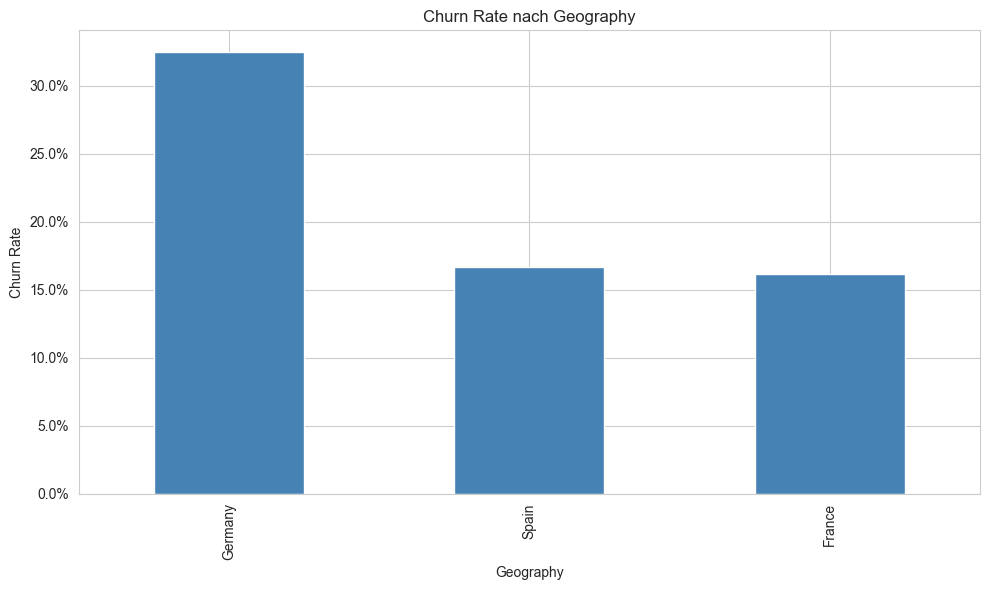

In [12]:
# Churn nach Geography
if 'Geography' in df.columns:
    geo_churn = df.groupby('Geography')[churn_col].agg(['mean', 'count'])
    geo_churn.columns = ['Churn_Rate', 'Total_Customers']
    geo_churn = geo_churn.sort_values('Churn_Rate', ascending=False)
    print("\nChurn Rate nach Geography:")
    print(geo_churn)

    # Visualisierung
    fig, ax = plt.subplots(figsize=(10, 6))
    geo_churn['Churn_Rate'].plot(kind='bar', ax=ax, color='steelblue')
    ax.set_title('Churn Rate nach Geography')
    ax.set_ylabel('Churn Rate')
    ax.set_xlabel('Geography')
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.1%}'))
    plt.tight_layout()
    plt.show()


Churn Rate nach Gender:
        Churn_Rate  Total_Customers
Gender                             
Female    0.250715             4543
Male      0.164559             5457


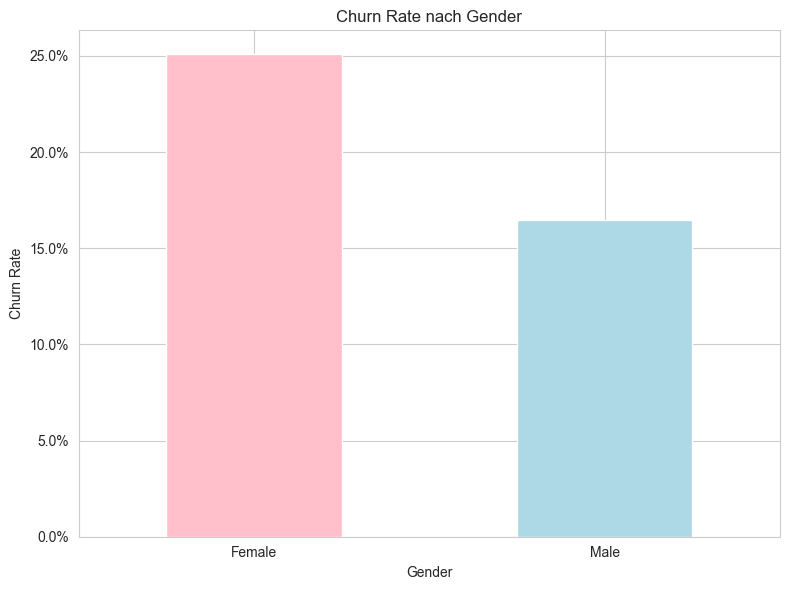

In [13]:
# Churn nach Gender
if 'Gender' in df.columns:
    gender_churn = df.groupby('Gender')[churn_col].agg(['mean', 'count'])
    gender_churn.columns = ['Churn_Rate', 'Total_Customers']
    print("\nChurn Rate nach Gender:")
    print(gender_churn)

    # Visualisierung
    fig, ax = plt.subplots(figsize=(8, 6))
    gender_churn['Churn_Rate'].plot(kind='bar', ax=ax, color=['pink', 'lightblue'])
    ax.set_title('Churn Rate nach Gender')
    ax.set_ylabel('Churn Rate')
    ax.set_xlabel('Gender')
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.1%}'))
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

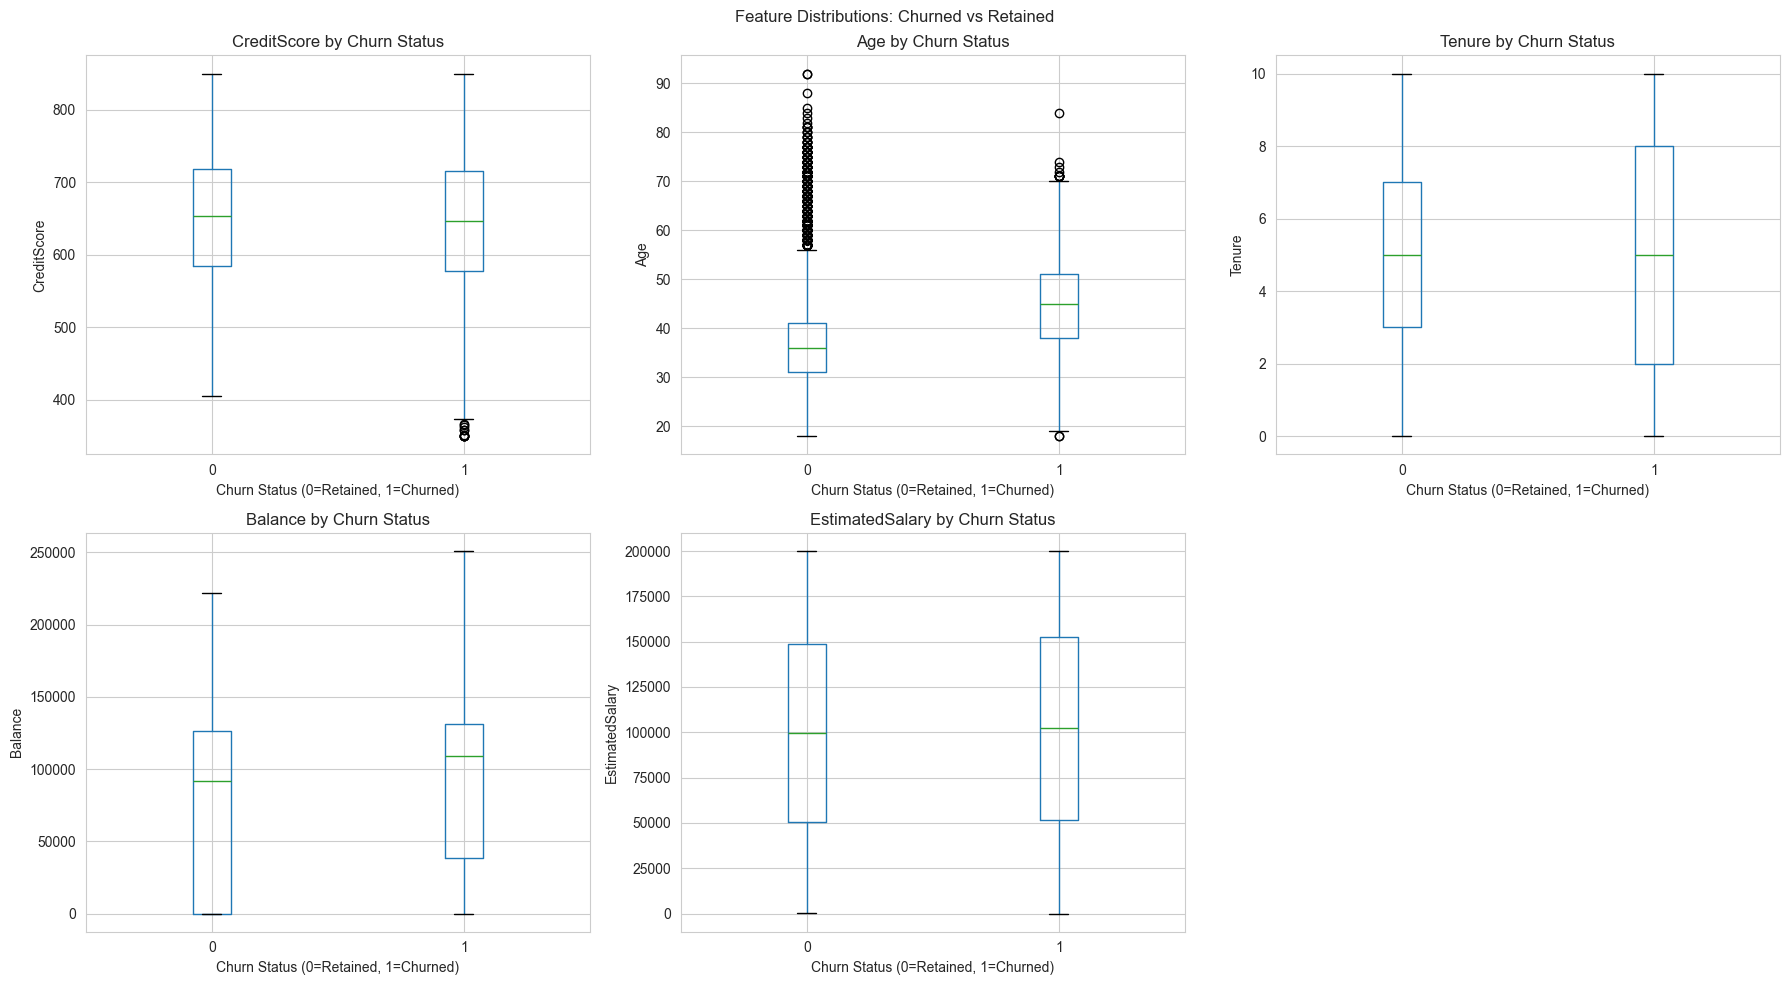

In [14]:
# Feature Distributions: Churned vs Retained
features_to_compare = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
features_to_compare = [f for f in features_to_compare if f in df.columns]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

for i, feature in enumerate(features_to_compare):
    # Box Plot
    df.boxplot(column=feature, by=churn_col, ax=axes[i])
    axes[i].set_title(f'{feature} by Churn Status')
    axes[i].set_xlabel('Churn Status (0=Retained, 1=Churned)')
    axes[i].set_ylabel(feature)

# Leere Plots ausblenden
for i in range(len(features_to_compare), len(axes)):
    axes[i].set_visible(False)

plt.suptitle('Feature Distributions: Churned vs Retained')
plt.tight_layout()
plt.show()

## 5. Feature Engineering für Mortgage Kontext

In [15]:
# Kopie für Transformation
mortgage_df = df.copy()

# Feature Renaming (Banking → Mortgage)
rename_mapping = {
    'Balance': 'outstanding_loan_balance',
    'Tenure': 'loan_age_years',
    'CreditScore': 'credit_score',
    'EstimatedSalary': 'annual_income',
    'NumOfProducts': 'num_bank_products',
    'IsActiveMember': 'online_banking_active',
    'HasCrCard': 'has_credit_card',
    'Exited': 'churned'
}

# Nur vorhandene Spalten umbenennen
rename_mapping_filtered = {k: v for k, v in rename_mapping.items() if k in mortgage_df.columns}
mortgage_df.rename(columns=rename_mapping_filtered, inplace=True)

print("✓ Features umbenannt")
print(f"Neue Spaltennamen: {mortgage_df.columns.tolist()}")

✓ Features umbenannt
Neue Spaltennamen: ['RowNumber', 'CustomerId', 'Surname', 'credit_score', 'Geography', 'Gender', 'Age', 'loan_age_years', 'outstanding_loan_balance', 'num_bank_products', 'has_credit_card', 'online_banking_active', 'annual_income', 'churned']


In [16]:
# Feature Engineering: Mortgage-spezifische Features

# 1. Monthly Income
if 'annual_income' in mortgage_df.columns:
    mortgage_df['monthly_income'] = mortgage_df['annual_income'] / 12
    print("✓ monthly_income berechnet")

# 2. Estimated Property Value
# Annahme: Property Value = 3.5x Annual Income (konservativ)
if 'annual_income' in mortgage_df.columns:
    mortgage_df['estimated_property_value'] = mortgage_df['annual_income'] * 3.5
    print("✓ estimated_property_value berechnet")

# 3. LTV Ratio (Loan-to-Value)
if 'outstanding_loan_balance' in mortgage_df.columns and 'estimated_property_value' in mortgage_df.columns:
    mortgage_df['ltv_ratio'] = (
        mortgage_df['outstanding_loan_balance'] / 
        mortgage_df['estimated_property_value']
    ).clip(0, 1.5)  # Cap bei 150% LTV
    print("✓ ltv_ratio berechnet")

# 4. Payment-to-Income Ratio
# Annahme: 5% Zinssatz p.a., monatliche Zahlung = Balance * 5% / 12
if 'outstanding_loan_balance' in mortgage_df.columns and 'monthly_income' in mortgage_df.columns:
    monthly_payment = mortgage_df['outstanding_loan_balance'] * 0.05 / 12
    mortgage_df['payment_to_income_ratio'] = (
        monthly_payment / mortgage_df['monthly_income']
    ).clip(0, 2)  # Cap bei 200%
    print("✓ payment_to_income_ratio berechnet")

# 5. Risk Score (Composite)
if all(col in mortgage_df.columns for col in ['credit_score', 'ltv_ratio', 'payment_to_income_ratio']):
    # Normalisierung und Gewichtung
    credit_risk = (850 - mortgage_df['credit_score']) / 550  # 0-1, höher = risikoreicher
    ltv_risk = mortgage_df['ltv_ratio']  # 0-1.5
    pti_risk = mortgage_df['payment_to_income_ratio']  # 0-2

    mortgage_df['risk_score'] = (
        credit_risk * 0.4 +
        ltv_risk * 0.3 +
        pti_risk * 0.3
    ).clip(0, 2)
    print("✓ risk_score berechnet")

# 6. Balance per Product (Engagement-Indikator)
if 'outstanding_loan_balance' in mortgage_df.columns and 'num_bank_products' in mortgage_df.columns:
    mortgage_df['balance_per_product'] = (
        mortgage_df['outstanding_loan_balance'] / 
        mortgage_df['num_bank_products'].replace(0, 1)  # Avoid division by zero
    )
    print("✓ balance_per_product berechnet")

print(f"\nNeue Features: {[col for col in mortgage_df.columns if col not in df.columns]}")

✓ monthly_income berechnet
✓ estimated_property_value berechnet
✓ ltv_ratio berechnet
✓ payment_to_income_ratio berechnet
✓ risk_score berechnet
✓ balance_per_product berechnet

Neue Features: ['credit_score', 'loan_age_years', 'outstanding_loan_balance', 'num_bank_products', 'has_credit_card', 'online_banking_active', 'annual_income', 'churned', 'monthly_income', 'estimated_property_value', 'ltv_ratio', 'payment_to_income_ratio', 'risk_score', 'balance_per_product']


In [17]:
# Inspektion der neuen Features
new_features = ['monthly_income', 'estimated_property_value', 'ltv_ratio', 
                'payment_to_income_ratio', 'risk_score', 'balance_per_product']
new_features = [f for f in new_features if f in mortgage_df.columns]

mortgage_df[new_features].describe()

,monthly_income,estimated_property_value,ltv_ratio,payment_to_income_ratio,risk_score,balance_per_product
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,8340.853323,350315.839583,0.337454,0.095457,0.274943,62819.698530
std,4792.541068,201286.724862,0.428703,0.249694,0.200902,56783.337793
min,0.965000,40.530000,0.000000,0.000000,0.000000,0.000000
25%,4250.175833,178507.385000,0.000000,0.000000,0.151273,0.000000
50%,8349.492917,350678.702500,0.213429,0.037350,0.225611,61166.240000
75%,12449.020625,522858.866250,0.432578,0.075701,0.328053,112654.835000
max,16666.040000,699973.680000,1.500000,2.000000,1.366364,238387.560000


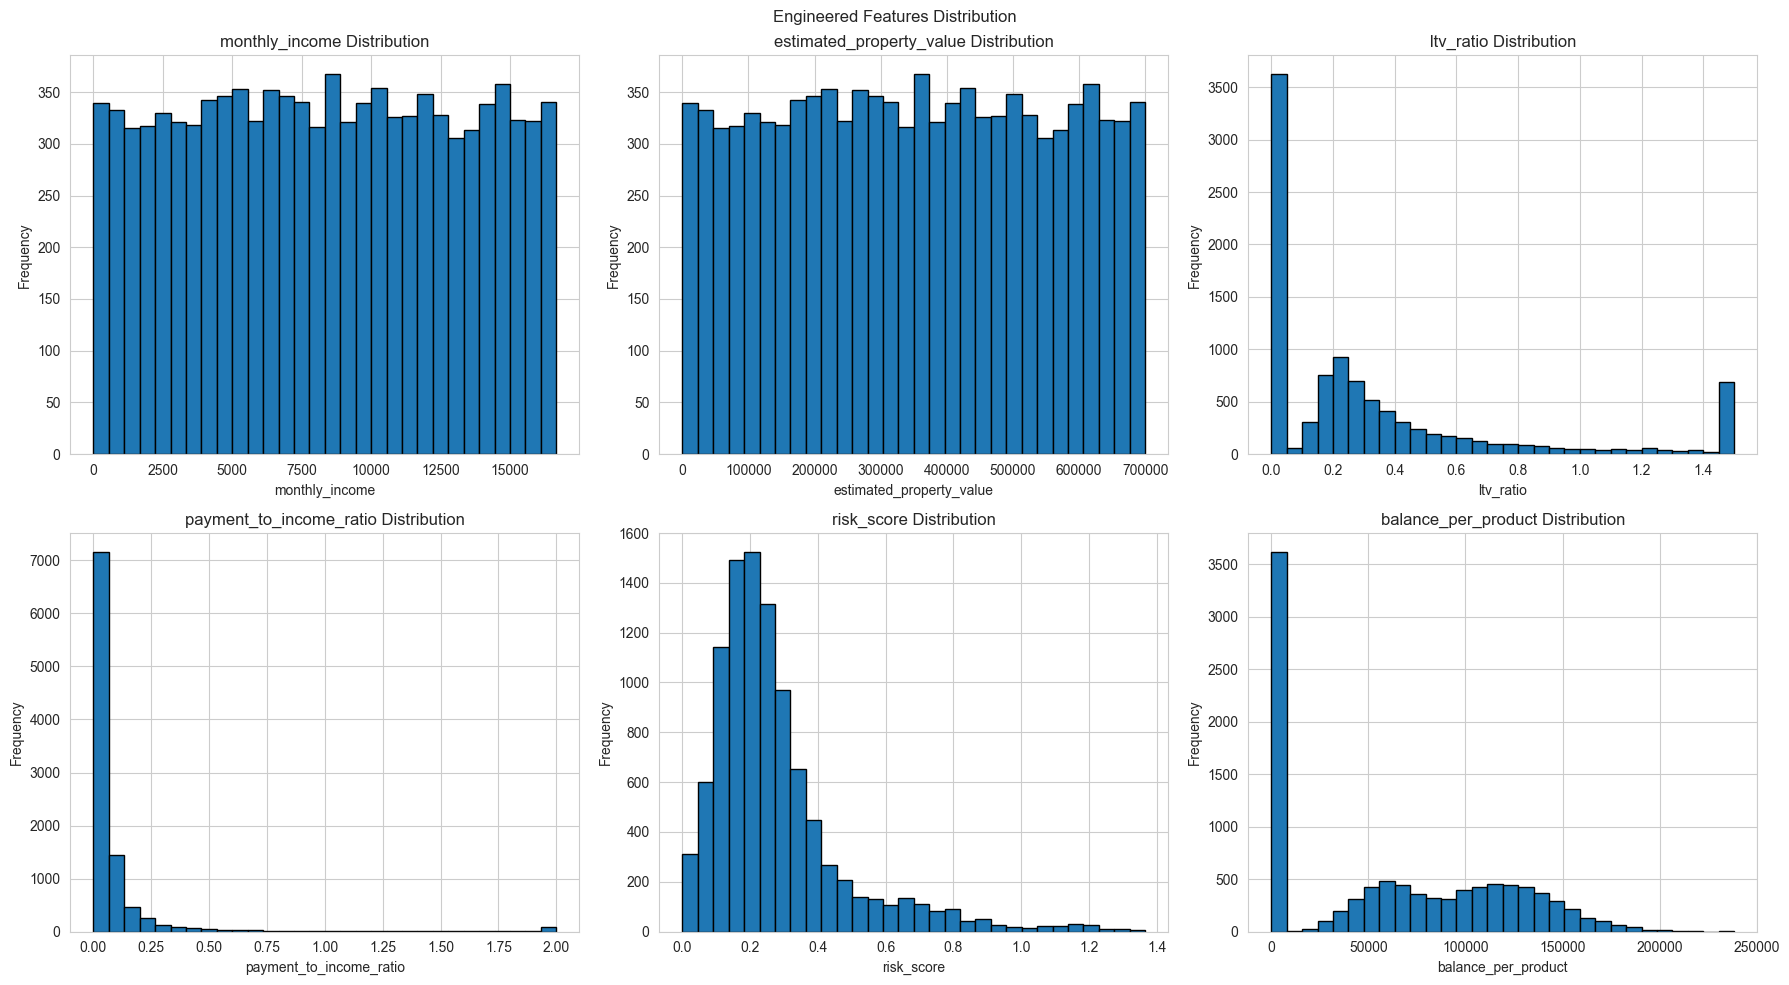

In [18]:
# Visualisierung neuer Features
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

for i, feature in enumerate(new_features):
    if feature in mortgage_df.columns:
        mortgage_df[feature].hist(bins=30, ax=axes[i], edgecolor='black')
        axes[i].set_title(f'{feature} Distribution')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Frequency')

# Leere Plots ausblenden
for i in range(len(new_features), len(axes)):
    axes[i].set_visible(False)

plt.suptitle('Engineered Features Distribution')
plt.tight_layout()
plt.show()

Feature Importance (basierend auf absoluter Korrelation mit Churn):
Age                         0.285323
online_banking_active       0.156128
outstanding_loan_balance    0.118533
balance_per_product         0.109806
ltv_ratio                   0.077853
risk_score                  0.074027
num_bank_products           0.047820
payment_to_income_ratio     0.039449
credit_score                0.027094
RowNumber                   0.016571
loan_age_years              0.014001
monthly_income              0.012097
annual_income               0.012097
estimated_property_value    0.012097
has_credit_card             0.007138
Name: churned, dtype: float64


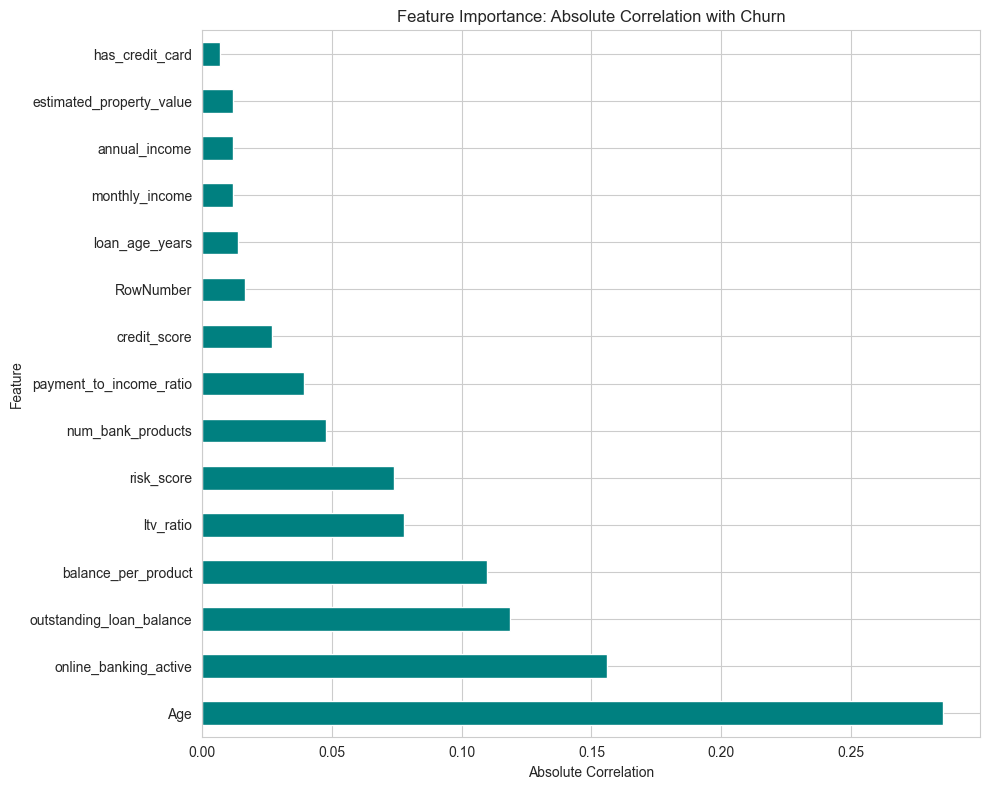

In [19]:
# Feature Importance für Churn (basierend auf Korrelation)
if 'churned' in mortgage_df.columns:
    # Numerische Features
    numeric_features = mortgage_df.select_dtypes(include=[np.number]).columns.tolist()
    numeric_features = [f for f in numeric_features if f != 'churned' and 'id' not in f.lower()]

    # Korrelation mit Churn
    churn_correlation = mortgage_df[numeric_features + ['churned']].corr()['churned'].drop('churned')
    churn_correlation = churn_correlation.abs().sort_values(ascending=False)

    print("Feature Importance (basierend auf absoluter Korrelation mit Churn):")
    print(churn_correlation)

    # Visualisierung
    fig, ax = plt.subplots(figsize=(10, 8))
    churn_correlation.plot(kind='barh', ax=ax, color='teal')
    ax.set_title('Feature Importance: Absolute Correlation with Churn')
    ax.set_xlabel('Absolute Correlation')
    ax.set_ylabel('Feature')
    plt.tight_layout()
    plt.show()

## 6. Datenexport für Modelltraining

In [20]:
# Speichere verarbeiteten Dataset
output_dir = PROJECT_ROOT / 'data' / 'processed'
output_dir.mkdir(parents=True, exist_ok=True)

output_file = output_dir / 'banking_churn_mortgage_adapted.csv'

mortgage_df.to_csv(output_file, index=False)
print(f"✓ Verarbeitete Daten gespeichert: {output_file}")
print(f"  Shape: {mortgage_df.shape}")
print(f"  Features: {len(mortgage_df.columns)}")

✓ Verarbeitete Daten gespeichert: /Users/manuel/Documents/Entwicklung/01 active/hypo-churn/data/processed/banking_churn_mortgage_adapted.csv
  Shape: (10000, 20)
  Features: 20


In [21]:
# Feature Liste für Modelltraining
model_features = [
    'credit_score',
    'Age',
    'loan_age_years',
    'outstanding_loan_balance',
    'num_bank_products',
    'online_banking_active',
    'has_credit_card',
    'annual_income',
    'monthly_income',
    'ltv_ratio',
    'payment_to_income_ratio',
    'risk_score',
    'balance_per_product'
]

# Nur Features die vorhanden sind
model_features = [f for f in model_features if f in mortgage_df.columns]

print("Empfohlene Features für Modelltraining:")
for i, feature in enumerate(model_features, 1):
    print(f"  {i}. {feature}")

print(f"\nTarget: churned")
print(f"Total Features: {len(model_features)}")

Empfohlene Features für Modelltraining:
  1. credit_score
  2. Age
  3. loan_age_years
  4. outstanding_loan_balance
  5. num_bank_products
  6. online_banking_active
  7. has_credit_card
  8. annual_income
  9. monthly_income
  10. ltv_ratio
  11. payment_to_income_ratio
  12. risk_score
  13. balance_per_product

Target: churned
Total Features: 13


## Zusammenfassung & Nächste Schritte

### Key Findings:
1. **Datensatz:** Sauber, keine Missing Values
2. **Churn Rate:** ~16% (realistisch für Banking)
3. **Features:** 13+ Features für Mortgage Churn Modell
4. **Engineering:** 6 neue mortgage-spezifische Features erstellt

### Nächste Schritte:
1. **Baseline Model Training:**
   ```python
   from hypo_churn.models import ChurnPredictor
   model = ChurnPredictor(model_type='random_forest')
   model.train(X_train, y_train)
   ```

2. **Feature Selection:**
   - Testen Sie verschiedene Feature-Kombinationen
   - Verwenden Sie Feature Importance aus Random Forest

3. **Hyperparameter Tuning:**
   - Grid Search oder Random Search
   - Cross-Validation

4. **Class Imbalance:**
   - SMOTE für Oversampling
   - Class Weights anpassen

5. **Model Evaluation:**
   - Precision-Recall Tradeoff
   - ROC-AUC Analyse
   - Confusion Matrix

### Exportierte Dateien:
- `data/processed/banking_churn_mortgage_adapted.csv` - Bereit für Training!